In [1]:
!pip install scikit-learn
!pip install --upgrade pixiedust
!pip install brunel

Requirement already up-to-date: pixiedust in c:\users\enter\anaconda3\lib\site-packages (1.1.19)


In [2]:
import pixiedust 
import sklearn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import arff
import brunel

Pixiedust database opened successfully


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'


In [4]:
raw_df

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,ADDR_STREET_NUMBER,ADDR_STREET_NAME,ADDR_UNIT_DESIGNATION,ADDR_UNIT_NUMBER,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25 00:00:00.0,2017-04-28 00:00:00.0,...,2153,MALLARD LN,NaN,NaN,HANOVER PARK,IL,60133,41.943656,-88.158922,-88.158922
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26 00:00:00.0,2018-08-31 00:00:00.0,...,13886,W EMMA LN,NaN,NaN,METTAWA,IL,60045,42.249667,-87.903629,-87.903629
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07 00:00:00.0,2016-01-11 00:00:00.0,...,8726,S DORCHESTER AVE,NaN,NaN,CHICAGO,IL,60619,41.736025,-87.590889,-87.590889
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11 00:00:00.0,2016-12-18 00:00:00.0,...,543,N HARDING AVE,NaN,NaN,CHICAGO,IL,60624,41.891161,-87.724383,-87.724383
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06 00:00:00.0,2017-06-08 00:00:00.0,...,6952,S HALSTED ST,NaN,NaN,CHICAGO,IL,60621,41.767273,-87.644831,-87.644831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,CM11612,GJI9724,QY3512250,A-2016-TJ210,3,NaN,1,77438.7,2016-11-29 00:00:00.0,2016-12-01 00:00:00.0,...,275,GEORGE RD,NaN,NaN,WHEELING,IL,60090,42.133817,-87.931114,-87.931114
971,HM55275,ORD4650,XR9202123,A-2016-EU678,1,NaN,3,219285.9,2016-08-14 00:00:00.0,2016-08-21 00:00:00.0,...,110,CAMBRIAN CT,NaN,NaN,ROSELLE,IL,60172,41.984274,-88.113463,-88.113463
972,BA79937,BLV8655,TU0769843,A-2016-MT971,1,NaN,1,192320.1,2016-08-22 00:00:00.0,2016-09-03 00:00:00.0,...,5021,S JUSTINE ST,NaN,NaN,CHICAGO,IL,60609,41.802500,-87.663237,-87.663237
973,AL29368,XBH9030,UU9571126,A-2017-ZX388,2,NaN,3,273023.9,2017-01-24 00:00:00.0,2017-02-04 00:00:00.0,...,2001,PADDOCK CT,NaN,NaN,WHEATON,IL,60187,41.886533,-88.099887,-88.099887


In [5]:
raw_df.head(10)

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,...,ADDR_STREET_NUMBER,ADDR_STREET_NAME,ADDR_UNIT_DESIGNATION,ADDR_UNIT_NUMBER,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25 00:00:00.0,2017-04-28 00:00:00.0,...,2153,MALLARD LN,NaN,NaN,HANOVER PARK,IL,60133,41.943656,-88.158922,-88.158922
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26 00:00:00.0,2018-08-31 00:00:00.0,...,13886,W EMMA LN,NaN,NaN,METTAWA,IL,60045,42.249667,-87.903629,-87.903629
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07 00:00:00.0,2016-01-11 00:00:00.0,...,8726,S DORCHESTER AVE,NaN,NaN,CHICAGO,IL,60619,41.736025,-87.590889,-87.590889
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11 00:00:00.0,2016-12-18 00:00:00.0,...,543,N HARDING AVE,NaN,NaN,CHICAGO,IL,60624,41.891161,-87.724383,-87.724383
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06 00:00:00.0,2017-06-08 00:00:00.0,...,6952,S HALSTED ST,NaN,NaN,CHICAGO,IL,60621,41.767273,-87.644831,-87.644831
5,DM94074,GBU7751,XP3473763,A-2018-XB432,1,NaN,3,326514.1,2018-03-06 00:00:00.0,2018-03-19 00:00:00.0,...,10607,SOUTHWEST HWY,APT,1B,WORTH,IL,60482,41.698491,-87.795412,-87.795412
6,MD38210,CBR4335,US5444269,A-2017-XP758,2,NaN,3,58477.9,2017-08-13 00:00:00.0,2017-08-18 00:00:00.0,...,1745,BUTTERFIELD LN,NaN,NaN,FLOSSMOOR,IL,60422,41.529887,-87.667547,-87.667547
7,GL77908,HZF3884,XR1994270,A-2017-QY946,1,NaN,3,176476.9,2017-02-10 00:00:00.0,2017-02-18 00:00:00.0,...,940,S LINDEN AVE,NaN,NaN,ELMHURST,IL,60126,41.870344,-87.927946,-87.927946
8,BA26199,CSE9523,VP6368585,A-2018-LB818,3,NaN,3,277812.7,2018-02-16 00:00:00.0,2018-02-24 00:00:00.0,...,45,SWIFT LN,NaN,NaN,NAPERVILLE,IL,60565,41.745043,-88.132447,-88.132447
9,EA38976,HFX7408,YP9758006,A-2016-QD338,5,NaN,3,190541.3,2016-12-28 00:00:00.0,2017-01-11 00:00:00.0,...,2930,N SHERIDAN RD,APT,808,CHICAGO,IL,60657,41.935238,-87.639715,-87.639715


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HOUSEHOLD_ID                975 non-null    object 
 1   DRIVER_ID                   975 non-null    object 
 2   POLICY_ID                   975 non-null    object 
 3   CLAIM_ID                    975 non-null    object 
 4   INCIDENT_CAUSE              975 non-null    int64  
 5   DESCRIPTION                 0 non-null      float64
 6   CLAIM_STATUS                975 non-null    int64  
 7   ODOMETER_AT_LOSS            975 non-null    float64
 8   LOSS_EVENT_TIME             975 non-null    object 
 9   CLAIM_INIT_TIME             975 non-null    object 
 10  POLICE_REPORT               975 non-null    int64  
 11  CLAIMS_AT_LOSS_DATE         975 non-null    int64  
 12  LOSS_LOCATION_LAT           975 non-null    float64
 13  LOSS_LOCATION_LONG          975 non

In [7]:
raw_df.describe()

,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,...,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT,WORK_ADDR_ZIPCODE,WORK_ADDR_LATITUDE,WORK_ADDR_LONGITUDE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
count,975.000000,0.0,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,2.974359,NaN,2.196923,178585.283282,0.429744,1.603077,41.858827,-87.676931,12476.822564,0.416410,...,170987.852308,0.092308,0.060513,60465.722051,41.864683,-87.783013,60392.612308,41.890259,-87.859524,-87.859524
std,1.503029,NaN,0.995983,99500.258502,0.495293,1.155022,0.085914,0.058369,13697.986713,0.493216,...,99443.427598,0.289608,0.238557,226.775920,0.191467,0.167721,244.087076,0.227007,0.184472,0.184472
min,1.000000,NaN,1.000000,21015.800000,0.000000,1.000000,41.651701,-87.905309,1000.000000,0.000000,...,18348.000000,0.000000,0.000000,60002.000000,41.306565,-88.259060,60002.000000,41.238749,-88.255529,-88.255529
25%,2.000000,NaN,1.000000,99356.900000,0.000000,1.000000,41.783034,-87.720619,1900.000000,0.000000,...,92310.000000,0.000000,0.000000,60402.000000,41.751744,-87.876153,60130.500000,41.740807,-88.021612,-88.021612
50%,3.000000,NaN,3.000000,163689.500000,0.000000,1.000000,41.874328,-87.673203,2780.000000,0.000000,...,155652.000000,0.000000,0.000000,60608.000000,41.871629,-87.722718,60455.000000,41.890419,-87.827112,-87.827112
75%,5.000000,NaN,3.000000,238025.200000,1.000000,2.000000,41.923888,-87.631030,24300.000000,1.000000,...,230514.000000,0.000000,0.000000,60628.000000,41.966417,-87.656004,60619.000000,42.009132,-87.693438,-87.693438
max,5.000000,NaN,4.000000,593427.400000,1.000000,8.000000,42.021691,-87.527492,48035.500000,1.000000,...,585828.000000,1.000000,1.000000,60827.000000,42.483388,-87.529539,60827.000000,42.491297,-87.527697,-87.527697


In [8]:
raw_df.isnull().sum()

HOUSEHOLD_ID                    0
DRIVER_ID                       0
POLICY_ID                       0
CLAIM_ID                        0
INCIDENT_CAUSE                  0
DESCRIPTION                   975
CLAIM_STATUS                    0
ODOMETER_AT_LOSS                0
LOSS_EVENT_TIME                 0
CLAIM_INIT_TIME                 0
POLICE_REPORT                   0
CLAIMS_AT_LOSS_DATE             0
LOSS_LOCATION_LAT               0
LOSS_LOCATION_LONG              0
CLAIM_AMOUNT                    0
FLAG_FOR_FRAUD_INV              0
PRIMARY_DRIVER_ID               0
START_DATE                      0
EXPIRY_DATE                     0
MODEL_YEAR                      0
MAKE                            0
MODEL                           0
PLATE                           0
COLOR                           0
INITIAL_ODOMETER                0
LOW_MILEAGE_USE                 0
FIRST_NAME                      0
LAST_NAME                       0
GENDER                          0
BIRTHDATE     

In [9]:
raw_df['CLAIM_ID']

0      A-2017-UU907
1      A-2018-FI481
2      A-2016-ZG694
3      A-2016-NG783
4      A-2017-ZO863
           ...     
970    A-2016-TJ210
971    A-2016-EU678
972    A-2016-MT971
973    A-2017-ZX388
974    A-2016-GP477
Name: CLAIM_ID, Length: 975, dtype: object


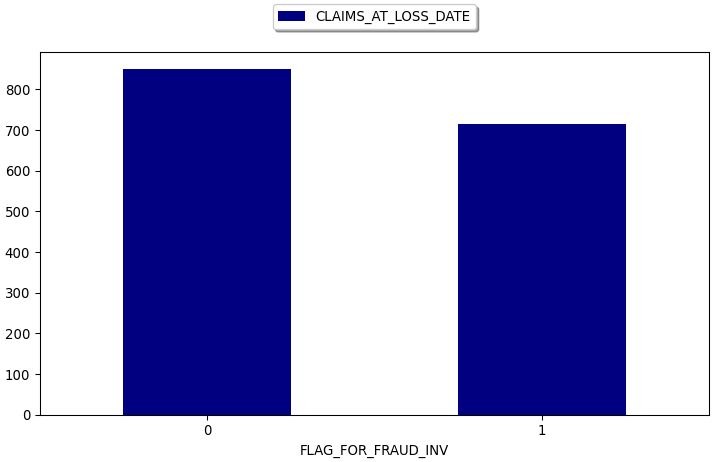

In [ ]:
display(raw_df)


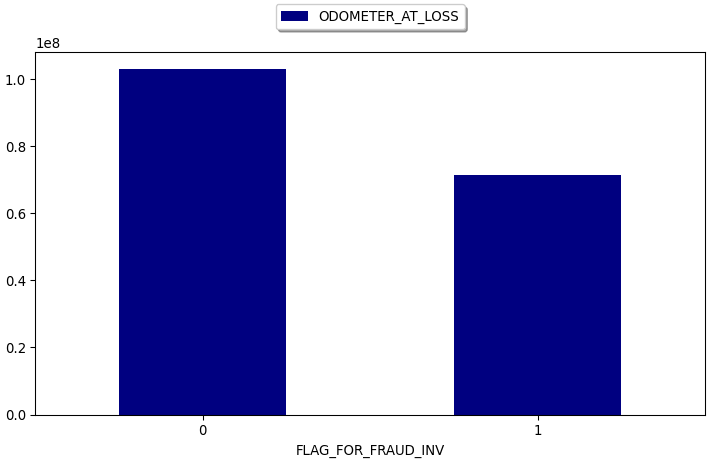

In [11]:
display(raw_df)


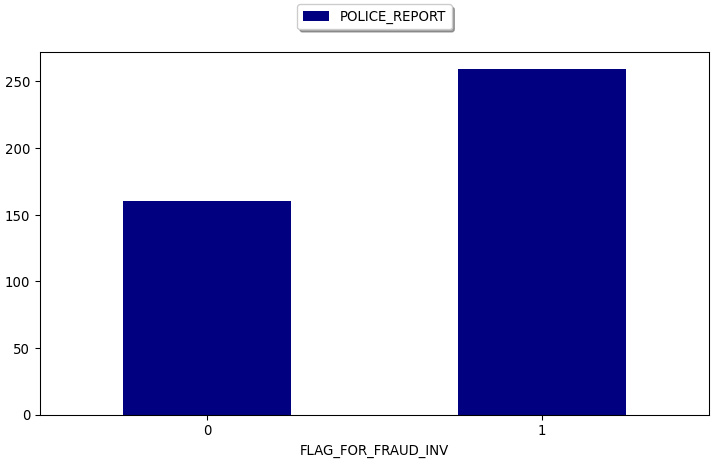

In [ ]:
display(raw_df)

In [13]:
raw_df['FLAG_FOR_FRAUD_INV']

0      1
1      0
2      1
3      1
4      0
      ..
970    1
971    0
972    1
973    0
974    0
Name: FLAG_FOR_FRAUD_INV, Length: 975, dtype: int64

In [ ]:
display(raw_df)

In [15]:
raw_df['POLICE_REPORT']

0      1
1      0
2      0
3      0
4      0
      ..
970    1
971    0
972    1
973    0
974    1
Name: POLICE_REPORT, Length: 975, dtype: int64

In [16]:
raw_df['EXPIRY_DATE']

0      2017-09-19
1      2018-06-14
2      2016-08-23
3      2016-07-24
4      2017-01-07
          ...    
970    2016-07-11
971    2016-07-20
972    2016-08-20
973    2017-04-21
974    2016-01-10
Name: EXPIRY_DATE, Length: 975, dtype: object

In [17]:
raw_df['LOSS_EVENT_TIME']

0      2017-04-25 00:00:00.0
1      2018-08-26 00:00:00.0
2      2016-01-07 00:00:00.0
3      2016-12-11 00:00:00.0
4      2017-06-06 00:00:00.0
               ...          
970    2016-11-29 00:00:00.0
971    2016-08-14 00:00:00.0
972    2016-08-22 00:00:00.0
973    2017-01-24 00:00:00.0
974    2016-07-05 00:00:00.0
Name: LOSS_EVENT_TIME, Length: 975, dtype: object

In [18]:
### Hypothesis-1 Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["EXPIRY_DATE"]=pd.to_datetime(raw_df["EXPIRY_DATE"])
raw_df["LOSS_EVENT_TIME"]=pd.to_datetime(raw_df["LOSS_EVENT_TIME"])

In [19]:
raw_df["DAYS_FROM_LOSS"]=raw_df["LOSS_EVENT_TIME"]-raw_df["EXPIRY_DATE"]

In [20]:
raw_df["DAYS_FROM_LOSS"]

0     -147 days
1       73 days
2     -229 days
3      140 days
4      150 days
         ...   
970    141 days
971     25 days
972      2 days
973    -87 days
974    177 days
Name: DAYS_FROM_LOSS, Length: 975, dtype: timedelta64[ns]

In [21]:
raw_df["DAYS_FROM_LOSS"]= abs(raw_df.DAYS_FROM_LOSS.dt.days)

In [22]:
raw_df.loc[raw_df['DAYS_FROM_LOSS']>=15,'SUSPICIOUS_CLAIM_TIME']=1
raw_df.loc[raw_df['DAYS_FROM_LOSS']<15,'SUSPICIOUS_CLAIM_TIME']=0

In [23]:
raw_df['SUSPICIOUS_CLAIM_TIME'].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [24]:
### Hypothesis-2 Expired drivers’ license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["DRIVERS_LICENSE_EXPIRY"]=pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])
raw_df["DAYS_EXPIRY"]=raw_df["DRIVERS_LICENSE_EXPIRY"]-raw_df["LOSS_EVENT_TIME"]

In [25]:
raw_df['DAYS_EXPIRY']

0      481 days
1     -211 days
2     1412 days
3      886 days
4     1126 days
         ...   
970    571 days
971   1097 days
972   1219 days
973   1332 days
974   1478 days
Name: DAYS_EXPIRY, Length: 975, dtype: timedelta64[ns]

In [26]:
raw_df["DAYS_EXPIRY"]=raw_df["DAYS_EXPIRY"].dt.days

In [27]:
raw_df["DAYS_EXPIRY"]

0       481
1      -211
2      1412
3       886
4      1126
       ... 
970     571
971    1097
972    1219
973    1332
974    1478
Name: DAYS_EXPIRY, Length: 975, dtype: int64

In [28]:
raw_df.loc[raw_df["DAYS_EXPIRY"]>=0, "EXPIRED_LICENSE"]=0
raw_df.loc[raw_df["DAYS_EXPIRY"]<0, "EXPIRED_LICENSE"]=1

In [29]:
raw_df["EXPIRED_LICENSE"]

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
970    0.0
971    0.0
972    0.0
973    0.0
974    0.0
Name: EXPIRED_LICENSE, Length: 975, dtype: float64

In [30]:
# Hypothesis-3 Days living at current address (date of loss - insurance_driver.date_at_current_address)
raw_df["DATE_AT_CURRENT_ADDRESS"]=pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])

In [31]:
raw_df["DAYS_ADDRESS"]=raw_df["LOSS_EVENT_TIME"]-raw_df["DATE_AT_CURRENT_ADDRESS"]

In [32]:
raw_df["DAYS_ADDRESS"]=raw_df["DAYS_ADDRESS"].dt.days

In [33]:
raw_df.loc[raw_df["DAYS_ADDRESS"]>=15, "SUSPICIOUS_LIVING"]=1
raw_df.loc[raw_df["DAYS_ADDRESS"]<15, "SUSPICIOUS_LIVING"]=0

In [34]:
raw_df["SUSPICIOUS_LIVING"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
970    1.0
971    1.0
972    1.0
973    1.0
974    1.0
Name: SUSPICIOUS_LIVING, Length: 975, dtype: float64

In [35]:
raw_df["SUSPICIOUS_LIVING"].value_counts()

1.0    943
0.0     32
Name: SUSPICIOUS_LIVING, dtype: int64

In [36]:
# Hypothesis 4 Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the time of loss(FIND NUMBER OF DAYS BETWEEN POLICY CREATION AND ACCIDENT)
raw_df["START_DATE"]=pd.to_datetime(raw_df["START_DATE"])

In [37]:
#FIND NUMBER OF DAYS BETWEEN POLICY CREATION AND ACCIDENT
raw_df["LENGTH_POLICY"]=raw_df["LOSS_EVENT_TIME"]-raw_df["START_DATE"]

In [38]:
raw_df["LENGTH_POLICY"]=raw_df["LENGTH_POLICY"].dt.days

In [39]:
#Converting into year
raw_df["LENGTH_POLICY"]=raw_df["LENGTH_POLICY"]/365

In [40]:
#Dive odometer at loss on the basis of years
raw_df["MILES_YEAR"]=raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_POLICY"]

In [41]:
raw_df["MILES_YEAR"]

0      263963.479358
1      188462.083333
2      225356.904412
3      223748.830693
4       96837.618447
           ...      
970     55859.931818
971    205229.111538
972    191272.034060
973    358466.631295
974    119873.677122
Name: MILES_YEAR, Length: 975, dtype: float64

In [42]:
raw_df.columns

Index(['HOUSEHOLD_ID', 'DRIVER_ID', 'POLICY_ID', 'CLAIM_ID', 'INCIDENT_CAUSE',
       'DESCRIPTION', 'CLAIM_STATUS', 'ODOMETER_AT_LOSS', 'LOSS_EVENT_TIME',
       'CLAIM_INIT_TIME', 'POLICE_REPORT', 'CLAIMS_AT_LOSS_DATE',
       'LOSS_LOCATION_LAT', 'LOSS_LOCATION_LONG', 'CLAIM_AMOUNT',
       'FLAG_FOR_FRAUD_INV', 'PRIMARY_DRIVER_ID', 'START_DATE', 'EXPIRY_DATE',
       'MODEL_YEAR', 'MAKE', 'MODEL', 'PLATE', 'COLOR', 'INITIAL_ODOMETER',
       'LOW_MILEAGE_USE', 'FIRST_NAME', 'LAST_NAME', 'GENDER', 'BIRTHDATE',
       'SSN', 'DRIVERS_LICENSE_ID', 'DRIVERS_LICENSE_EXPIRY',
       'DRIVERS_LICENSE_STATE', 'DATE_AT_CURRENT_ADDRESS', 'CONTACT_NUMBER',
       'EMAIL', 'COMMUTE_DISCOUNT', 'WORK_ADDR_NUMB', 'WORK_ADDR_STREET_NAME',
       'WORK_ADDR_UNIT_DESIGNATION', 'WORK_ADDR_UNIT_NUMBER', 'WORK_ADDR_CITY',
       'WORK_ADDR_STATE', 'WORK_ADDR_ZIPCODE', 'WORK_ADDR_LATITUDE',
       'WORK_ADDR_LONGITUDE', 'WORK_ADDR_PBKEY', 'ADDR_STREET_NUMBER',
       'ADDR_STREET_NAME', 'ADDR_UNIT_DESIG

In [43]:
raw_df["LOW_MILEAGE_USE"]

0      0
1      0
2      1
3      0
4      0
      ..
970    0
971    0
972    0
973    0
974    0
Name: LOW_MILEAGE_USE, Length: 975, dtype: int64

In [44]:
raw_df.loc[raw_df["MILES_YEAR"]<7500, "LOW_MILAGE_AT_LOSS"]=1
raw_df.loc[raw_df["MILES_YEAR"]>=7500, "LOW_MILAGE_AT_LOSS"]=0

In [45]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]== raw_df["LOW_MILAGE_AT_LOSS"], "SUSPICIOUS_MILAGE"] = 0
raw_df.loc[raw_df["LOW_MILEAGE_USE"]!= raw_df["LOW_MILAGE_AT_LOSS"], "SUSPICIOUS_MILAGE"] = 1

In [46]:
raw_df["SUSPICIOUS_MILAGE"]

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
970    0.0
971    0.0
972    0.0
973    0.0
974    0.0
Name: SUSPICIOUS_MILAGE, Length: 975, dtype: float64

In [47]:
#Hypothesis-5
raw_df.loc[raw_df["CLAIM_AMOUNT"]<3000, "EXCESSIVE_CLAIM_AMOUNT"]=0
raw_df.loc[raw_df["CLAIM_AMOUNT"]>=3000, "EXCESSIVE_CLAIM_AMOUNT"]=1

In [48]:
raw_df["EXCESSIVE_CLAIM_AMOUNT"]

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
970    1.0
971    0.0
972    1.0
973    0.0
974    0.0
Name: EXCESSIVE_CLAIM_AMOUNT, Length: 975, dtype: float64

In [49]:
raw_df.columns

Index(['HOUSEHOLD_ID', 'DRIVER_ID', 'POLICY_ID', 'CLAIM_ID', 'INCIDENT_CAUSE',
       'DESCRIPTION', 'CLAIM_STATUS', 'ODOMETER_AT_LOSS', 'LOSS_EVENT_TIME',
       'CLAIM_INIT_TIME', 'POLICE_REPORT', 'CLAIMS_AT_LOSS_DATE',
       'LOSS_LOCATION_LAT', 'LOSS_LOCATION_LONG', 'CLAIM_AMOUNT',
       'FLAG_FOR_FRAUD_INV', 'PRIMARY_DRIVER_ID', 'START_DATE', 'EXPIRY_DATE',
       'MODEL_YEAR', 'MAKE', 'MODEL', 'PLATE', 'COLOR', 'INITIAL_ODOMETER',
       'LOW_MILEAGE_USE', 'FIRST_NAME', 'LAST_NAME', 'GENDER', 'BIRTHDATE',
       'SSN', 'DRIVERS_LICENSE_ID', 'DRIVERS_LICENSE_EXPIRY',
       'DRIVERS_LICENSE_STATE', 'DATE_AT_CURRENT_ADDRESS', 'CONTACT_NUMBER',
       'EMAIL', 'COMMUTE_DISCOUNT', 'WORK_ADDR_NUMB', 'WORK_ADDR_STREET_NAME',
       'WORK_ADDR_UNIT_DESIGNATION', 'WORK_ADDR_UNIT_NUMBER', 'WORK_ADDR_CITY',
       'WORK_ADDR_STATE', 'WORK_ADDR_ZIPCODE', 'WORK_ADDR_LATITUDE',
       'WORK_ADDR_LONGITUDE', 'WORK_ADDR_PBKEY', 'ADDR_STREET_NUMBER',
       'ADDR_STREET_NAME', 'ADDR_UNIT_DESIG

In [50]:
features=['FLAG_FOR_FRAUD_INV','SUSPICIOUS_MILAGE','EXPIRED_LICENSE','EXPIRED_LICENSE', 'SUSPICIOUS_LIVING','EXCESSIVE_CLAIM_AMOUNT']

In [51]:
df_datamodel=raw_df[features]

In [52]:
raw_df.groupby("FLAG_FOR_FRAUD_INV").mean()

,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,MODEL_YEAR,...,SUSPICIOUS_CLAIM_TIME,DAYS_EXPIRY,EXPIRED_LICENSE,DAYS_ADDRESS,SUSPICIOUS_LIVING,LENGTH_POLICY,MILES_YEAR,LOW_MILAGE_AT_LOSS,SUSPICIOUS_MILAGE,EXCESSIVE_CLAIM_AMOUNT
FLAG_FOR_FRAUD_INV,,,,,,,,,,,,,,,,,,,,,
0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,2008.365554,...,0.933216,894.546573,0.042179,3478.268893,0.978910,1.070159,205170.356701,0.0,0.094903,0.086116
1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,2008.697044,...,0.945813,917.960591,0.036946,3222.142857,0.950739,0.960490,230687.578997,0.0,0.088670,0.933498


In [53]:
#Spliting of data into x & y variable
VAR_X=df_datamodel[['SUSPICIOUS_MILAGE','EXPIRED_LICENSE', 'SUSPICIOUS_LIVING','EXCESSIVE_CLAIM_AMOUNT']]
VAR_Y=df_datamodel['FLAG_FOR_FRAUD_INV']

In [54]:
VAR_X.head()

,SUSPICIOUS_MILAGE,EXPIRED_LICENSE,EXPIRED_LICENSE,SUSPICIOUS_LIVING,EXCESSIVE_CLAIM_AMOUNT
0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0


In [55]:
#Split into test & train dataset
x_train, x_test, y_train, y_test,=train_test_split(VAR_X,VAR_Y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [56]:
#Training of model
output_model=RandomForestClassifier(n_jobs=2,random_state=0)
output_model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [57]:
#Creating confusion matrix to predict the model
predict_model=output_model.predict(x_test)
pd.crosstab(y_test,predict_model,rownames=['ACTUAL_RESULT'],colnames=['PREDIT_RESULT'])

PREDIT_RESULT,0,1
ACTUAL_RESULT,,
0,108,13
1,4,70
